In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd "drive/MyDrive/Research/Projects/Github Portfolio/Price_Tag_Detection"

Mounted at /content/drive
/content/drive/MyDrive/Research/Projects/Github Portfolio/Price_Tag_Detection


Main ref: https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data

Modifications:

- models/common.py:      #label = f'{self.names[int(cls)]} {conf:.2f}'

- utils/plots.py: size=font_size or max(round(sum(self.im.size) / 2 * 0.0025), 6))

- utils/plots.py: self.lw = line_width or max(round(sum(im.shape) / 2 * 0.00025), 1)  # line width


In [ ]:
#!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt  # install dependencies
#import val as validate  # for end-of-epoch mAP
#ModuleNotFoundError: No module named 'val'
#The above command is only for eval (https://pytorch.org/hub/ultralytics_yolov5/)

In [ ]:
#!git clone https://github.com/tzutalin/labelImg
#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc
#labelling directory: https://www.youtube.com/watch?v=tFNJGim3FXw (53:30)

In [ ]:
#!git clone https://github.com/ultralytics/yolov5 

In [ ]:
#!cd yolov5 & pip install -r requirements.txt
#!pip install -r yolov5/requirements.txt

Training data should be here: "/content/drive/MyDrive/Research/Projects/Github Portfolio/Price_Tag_Detection/data/images"

dataset.yaml from: https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml, youtube: 1:00:48

Move dataset.yaml inside Price_Tag_Detection/yolov5/

Change class.txt to contain only one label, i.e. price_tag

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import os

In [ ]:
dir = "Assessment Test"
img_paths = [os.path.join(dir,x) for x in os.listdir(dir) if x.endswith(".jpg")]
img_paths

['Assessment Test/AEONBIGBATUPAHATPS_20220706T103517396.jpg',
 'Assessment Test/AEONIPOHKLEBANG_20220713T155040955.jpg',
 'Assessment Test/AEONIPOHKLEBANG_20220722T131859931.jpg',
 'Assessment Test/AEONIPOHSTATION18_20220720T120136589.jpg',
 'Assessment Test/AEONSERIMANJUNGSTORE_20220715T150246764.jpg',
 'Assessment Test/AEONTAIPINGMALL_20220714T123108996.jpg']

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-13 Python-3.7.14 torch-1.12.1+cu113 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
results = model(img_paths[0])

In [ ]:
results.print() #img size = 2048x1536

image 1/1: 2048x1536 1 bottle, 1 refrigerator
Speed: 161.0ms pre-process, 661.2ms inference, 10.1ms NMS per image at shape (1, 3, 640, 480)


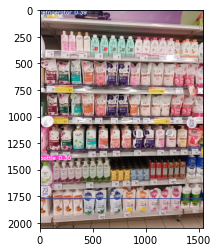

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
#!cd yolov5 && python train.py --img 320 --batch 4 --epochs 350 --data dataset.yaml --weights yolov5s.pt --workers 2
!cd yolov5 && python train.py --img 640 --batch 4 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 2 --patience 20 #ep10, ep

Change has taken place!!
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=20, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
requirements: YOLOv5 requirements "ipython" "thop>=0.1.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /content/drive/MyDrive/Research/Projects/Github Portfolio/Price_Tag_Detection/yolov5/requirements.txt
req

In [ ]:
#model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)
model = torch.hub.load('/content/drive/MyDrive/Research/Projects/Github Portfolio/Price_Tag_Detection/yolov5', 'custom', source="local", path='yolov5/runs/train/exp14/weights/best.pt', force_reload=True,)

YOLOv5 🚀 2022-10-8 Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model.iou = 0.2
model.conf = 0.3
"""
default (for NMS):
    conf = 0.25  # NMS confidence threshold
    iou = 0.45  # NMS IoU threshold
"""

'\ndefault (for NMS):\n    conf = 0.25  # NMS confidence threshold\n    iou = 0.45  # NMS IoU threshold\n'

In [ ]:
from PIL import Image
results = model([Image.open(path) for path in img_paths])
#results = model(img_paths[0])

In [ ]:
results.print()

image 1/6: 2048x1536 44 price_tags
image 2/6: 2048x1536 51 price_tags
image 3/6: 2048x1536 33 price_tags
image 4/6: 2048x1536 63 price_tags
image 5/6: 2048x1536 38 price_tags
image 6/6: 2048x1536 43 price_tags
Speed: 79.7ms pre-process, 335.2ms inference, 4.6ms NMS per image at shape (6, 3, 640, 480)


In [ ]:
%matplotlib inline
plt.figure(figsize=(25, 50))

for i in range(len(img_paths)):
  ax = plt.subplot(3, 2, i + 1)
  img = results.render()[i]
  plt.imshow(img)
  #cv2.imwrite(os.path.join("runs/detect/exp5", img_paths[i].split('/')[-1]), img) #color will go off
  plt.imsave(os.path.join("runs/detect/exp5", img_paths[i].split('/')[-1]), img)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
crops = results.crop(save=True)

Saved 6 images to runs/detect/exp5
Saved results to runs/detect/exp5



In [ ]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,938.512695,442.411682,1012.228699,484.623596,0.842660,15,price_tag
1,509.624939,415.148254,584.118713,469.933685,0.841864,15,price_tag
2,437.068756,1619.228760,495.473236,1668.676392,0.834714,15,price_tag
3,674.861145,1612.599365,727.940918,1671.687256,0.827457,15,price_tag
4,1097.537720,1316.760498,1156.287476,1356.912476,0.813403,15,price_tag
5,1046.206299,1591.854736,1092.722412,1635.987793,0.811909,15,price_tag
6,224.653656,1333.113525,275.157227,1387.450439,0.811056,15,price_tag
7,131.498703,1641.925171,203.865753,1697.145142,0.800315,15,price_tag
8,104.347183,1334.957153,166.254135,1388.995850,0.798203,15,price_tag
9,677.705994,411.509583,756.693604,467.939850,0.797450,15,price_tag
